<a href="https://colab.research.google.com/github/IvanChekalov-DA/Exploratory_data_analysis_for_online_store/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data overview**
*Importing the dataset and the necessary libraries to work with the data:*

In [ ]:
#Importing libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/Mate_Homework

df_countries = pd.read_csv("countries.csv")
df_events = pd.read_csv("events.csv")
df_products = pd.read_csv("products.csv")


Mounted at /content/drive
/content/drive/MyDrive/Mate_Homework


In [ ]:
df_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
df_events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
df_products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


#**Data cleaning**
*Data inspection and cleaning: handling missing values, anomalies, and duplicates in preparation for analysis.*

##**Checking for missing values:**

In [ ]:
df_events.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


##**Replacing missing values in "country code" with "Unknown", and removing rows with other NaN values because they have no influence on the analysis:**

In [ ]:
df_events["Country Code"] = df_events["Country Code"].fillna("Unknown")
df_events = df_events.dropna()
df_events.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,0
Product ID,0
Sales Channel,0
Units Sold,0
Unit Price,0
Unit Cost,0


##**Verifying that the dtype is correct:**

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1328 non-null   int64  
 1   Order Date      1328 non-null   object 
 2   Ship Date       1328 non-null   object 
 3   Order Priority  1328 non-null   object 
 4   Country Code    1328 non-null   object 
 5   Product ID      1328 non-null   int64  
 6   Sales Channel   1328 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1328 non-null   float64
 9   Unit Cost       1328 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 114.1+ KB


##**Converting Order Date and Ship Date columns to the appropriate data type:**

In [ ]:
df_events["Order Date"] = pd.to_datetime(df_events["Order Date"])
df_events["Ship Date"] = pd.to_datetime(df_events["Ship Date"])
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


##**Checking for anomaly values:**

In [ ]:
df_events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.328000e+03,1328,1328,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,2013-10-11 22:28:54.939759104,2013-11-05 17:22:02.891566336,5787.775602,4952.201807,264.913245,187.211521
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,2011-12-14 06:00:00,2012-01-02 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,2015-08-29 12:00:00,2015-10-04 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573496e+08,NaN,NaN,2820.635702,2905.198996,217.386320,176.187801


In [ ]:
sorted_by_units_sold = df_events.sort_values(by="Units Sold", ascending=False)
sorted_by_units_sold.head(100)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
424,387098824,2013-12-23,2014-01-04,H,GBR,3127,Offline,9999.0,81.73,56.67
1033,775849616,2012-02-17,2012-03-05,C,PRT,8681,Offline,9997.0,651.21,524.96
242,261187350,2012-10-02,2012-10-03,C,IRL,2455,Online,9996.0,109.28,35.84
1084,821131742,2015-12-09,2015-12-09,H,SMR,7940,Offline,9985.0,668.27,502.54
47,128686225,2011-01-25,2011-03-13,M,HUN,7331,Online,9968.0,255.28,159.42
...,...,...,...,...,...,...,...,...,...,...
915,696839892,2015-12-17,2016-01-02,C,MKD,8681,Offline,9264.0,651.21,524.96
1123,850562655,2014-08-11,2014-09-25,M,CHE,7331,Offline,9246.0,255.28,159.42
703,567751824,2011-10-21,2011-11-21,C,MLT,8293,Online,9236.0,437.20,263.33
1190,905036389,2016-11-01,2016-11-20,L,POL,2103,Online,9234.0,205.70,117.11


##**Checking for duplicates:**

In [ ]:
df_events['Order Priority'] = df_events['Order Priority'].str.lower()
df_events['Country Code'] = df_events['Country Code'].str.upper()
df_events['Sales Channel'] = df_events['Sales Channel'].str.lower()
duplicate_rows = df_events["Order ID"].duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Name: Order ID, Length: 1328, dtype: bool
0


In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


#**Data Analysis**

##**Joining tables, removing unnecessary columns, renaming columns:**

In [ ]:
df_products["Product ID"] = df_products["id"]
first_join = pd.merge(df_events, df_products, on="Product ID", how="left")
df_countries["Country Code"] = df_countries["alpha-3"]
final_data = pd.merge(first_join, df_countries, on="Country Code", how="left")
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
 10  id              1328 non-null   int64         
 11  item_type       1328 non-null   object        
 12  name            1246 non-null   object        
 13  alpha-2         1246 non-null   object        
 14  alpha-3         1246 non-null   object        
 15  regi

In [ ]:
final_data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,m,NOR,2103,online,650.0,205.70,117.11,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,c,SRB,2103,offline,1993.0,205.70,117.11,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,m,UNKNOWN,7940,online,4693.0,668.27,502.54,7940,Household,NaN,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,l,MNE,2455,online,1171.0,109.28,35.84,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,h,SRB,1270,offline,7648.0,47.45,31.79,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe


In [ ]:
final_data = final_data.drop(["id"], axis=1)
final_data = final_data.drop(["Order Priority"], axis=1)
final_data = final_data.drop(["alpha-2"], axis=1)
final_data = final_data.drop(["alpha-3"], axis=1)
final_data = final_data.drop(["Country Code"], axis=1)
final_data.head()

,Order ID,Order Date,Ship Date,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,region,sub-region
0,100640618,2014-10-08,2014-10-18,2103,online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,2103,offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,7940,online,4693.0,668.27,502.54,Household,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,2455,online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,1270,offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


In [ ]:
final_data['Order Date'] = pd.to_datetime(final_data['Order Date'])
final_data['Ship Date'] = pd.to_datetime(final_data['Ship Date'])
final_data['name'] = final_data['name'].fillna("Unknown")
final_data['region'] = final_data['region'].fillna("Unknown")
final_data['sub-region'] = final_data['sub-region'].fillna("Unknown")
final_data = final_data.rename(columns={
    'Order ID': 'order_id',
    'Order Date': 'order_date',
    'Ship Date': 'ship_date',
    'Product ID': 'product_id',
    'Sales Channel': 'sales_channel',
    'Units Sold': 'units_sold',
    'Unit Price': 'unit_price',
    'Unit Cost': 'unit_cost',
    'item_type': 'product_category',
    'name': 'country',
})


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          1328 non-null   int64         
 1   order_date        1328 non-null   datetime64[ns]
 2   ship_date         1328 non-null   datetime64[ns]
 3   product_id        1328 non-null   int64         
 4   sales_channel     1328 non-null   object        
 5   units_sold        1328 non-null   float64       
 6   unit_price        1328 non-null   float64       
 7   unit_cost         1328 non-null   float64       
 8   product_category  1328 non-null   object        
 9   country           1328 non-null   object        
 10  region            1328 non-null   object        
 11  sub-region        1328 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 124.6+ KB


##**Key metrics:**

In [ ]:
order_count = final_data["order_id"].nunique()
print(f"Number of orders: {order_count}")
category_count = final_data["product_category"].nunique()
print(f"Number of product categories: {category_count}")
country_count = final_data["country"].nunique()
print(f"Number of covered countries: {country_count}")
final_data["total_revenue"] = final_data["unit_price"] * final_data["units_sold"]
print(f"Total revenue: {final_data["total_revenue"].sum()}")
final_data["total_cost"] = final_data["unit_cost"] * final_data["units_sold"]
print(f"Total cost: {final_data["total_cost"].sum()}")
final_data["total_profit"] = final_data["total_revenue"] - final_data["total_cost"]
print(f"Total profit: {final_data["total_profit"].sum()}")

Number of orders: 1328
Number of product categories: 12
Number of covered countries: 46
Total revenue: 1702129408.21
Total cost: 1200694949.21
Total profit: 501434459.0


##**Sales categories analysis:**

In [ ]:
category_summary = final_data.groupby('product_category').agg({
    'total_revenue':'sum',
    'total_cost':'sum',
    'total_profit':'sum',
    'order_id':'count'
}).rename(columns={'order_id':'order_count'})
category_summary.head(20)

,total_revenue,total_cost,total_profit,order_count
product_category,,,,
Baby Food,1.436476e+08,8.970659e+07,53940997.16,112
Beverages,2.909316e+07,1.949150e+07,9601662.78,121
Cereal,9.579140e+07,5.453637e+07,41255034.15,103
Clothes,6.462655e+07,2.119524e+07,43431314.40,105
Cosmetics,2.331548e+08,1.404315e+08,92723306.17,114
Fruits,5.520300e+06,4.094370e+06,1425929.52,112
Household,2.942052e+08,2.212427e+08,72962466.77,97
Meat,2.237620e+08,1.934243e+08,30337736.00,110
Office Supplies,4.022140e+08,3.242368e+08,77977176.25,123


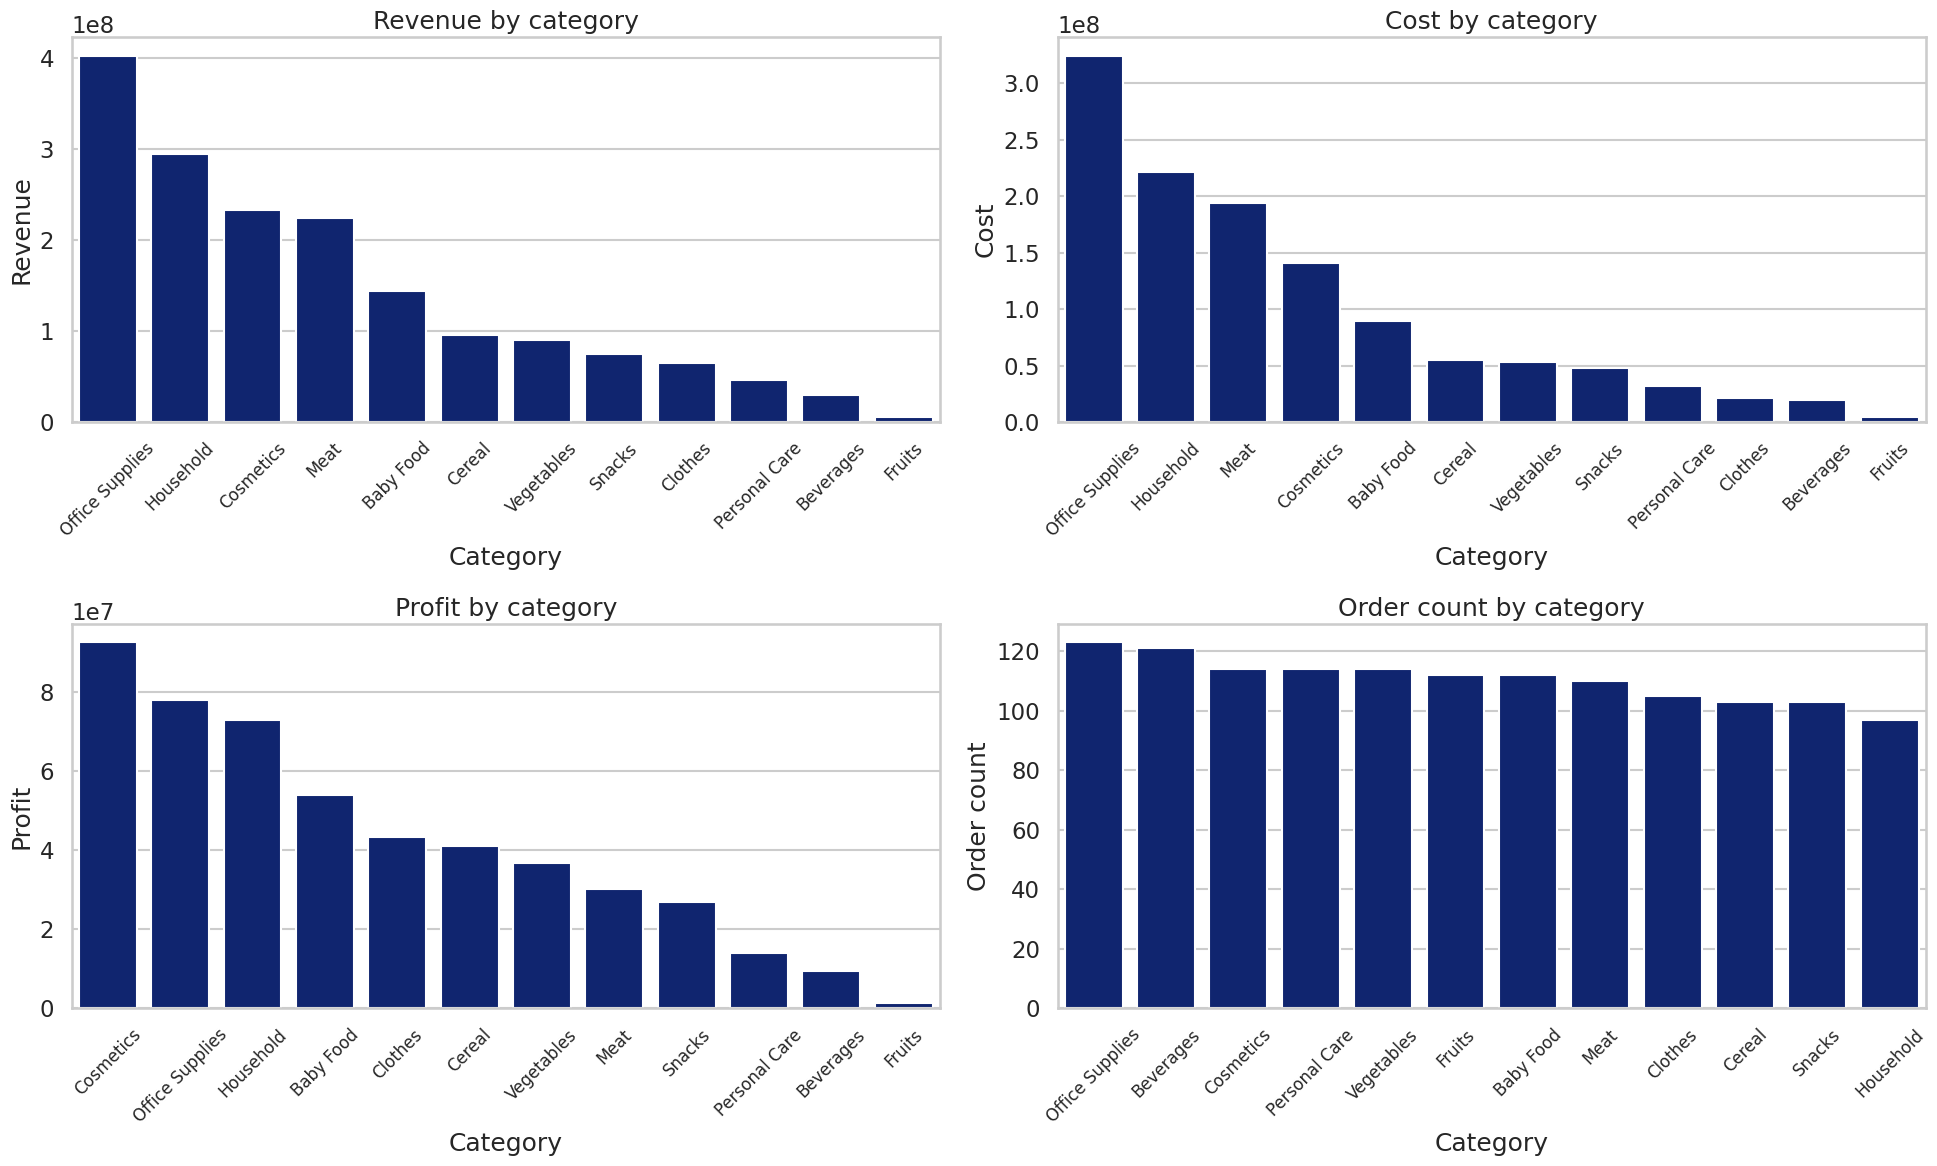

In [ ]:
sns.set_theme(style="whitegrid", context="talk", palette="dark")
fig, axes = plt.subplots(2, 2, figsize=(20,12))

sns.barplot(data=category_summary.sort_values('total_revenue', ascending=False), x="product_category", y="total_revenue", errorbar=("ci", False), estimator=np.sum, ax=axes[0,0])
axes[0,0].set_title('Revenue by category')
axes[0,0].set_xlabel('Category')
axes[0,0].set_ylabel('Revenue')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=12)

sns.barplot(data=category_summary.sort_values('total_cost', ascending=False), x="product_category", y="total_cost", errorbar=("ci", False), estimator=np.sum, ax=axes[0,1])
axes[0,1].set_title('Cost by category')
axes[0,1].set_xlabel('Category')
axes[0,1].set_ylabel('Cost')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=12)

sns.barplot(data=category_summary.sort_values('total_profit', ascending=False), x="product_category", y="total_profit", errorbar=("ci", False), estimator=np.sum, ax=axes[1,0])
axes[1,0].set_title('Profit by category')
axes[1,0].set_xlabel('Category')
axes[1,0].set_ylabel('Profit')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=12)

sns.barplot(data=category_summary.sort_values('order_count', ascending=False), x="product_category", y="order_count", errorbar=("ci", False), estimator=np.sum, ax=axes[1,1])
axes[1,1].set_title('Order count by category')
axes[1,1].set_xlabel('Category')
axes[1,1].set_ylabel('Order count')
axes[1,1].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()


##**Sales channel analysis:**

In [ ]:
final_data["sales_channel"] = final_data["sales_channel"].str.lower()
sales_channel_summary = final_data.groupby('sales_channel').agg({
    'total_revenue':'sum',
    'total_cost':'sum',
    'total_profit':'sum',
    'order_id':'count'
}).rename(columns={'order_id':'order_count'})
sales_channel_summary.head(20)

,total_revenue,total_cost,total_profit,order_count
sales_channel,,,,
offline,8.717606e+08,6.182941e+08,2.534665e+08,665
online,8.303688e+08,5.824008e+08,2.479679e+08,663


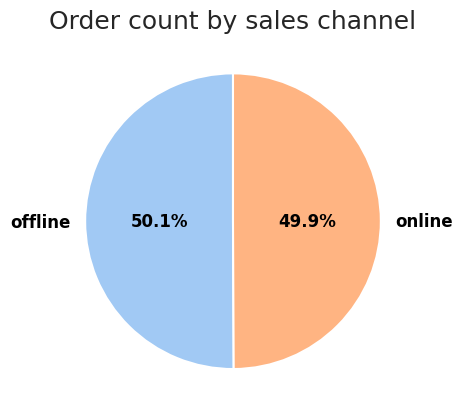

In [ ]:
plt.pie(sales_channel_summary["order_count"], labels=sales_channel_summary.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"), textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}, pctdistance=0.5)
plt.title("Order count by sales channel")
plt.show()

#**Sales by country and region analysis**

In [ ]:
country_summary = final_data.groupby('country').agg({
    'total_revenue':'sum',
    'total_cost':'sum',
    'total_profit':'sum',
    'order_id':'count'
}).rename(columns={'order_id':'order_count'})
top_10_country_by_order_count = country_summary.sort_values('order_count', ascending=False).head(10)
top_10_country_by_profit = country_summary.sort_values('total_profit', ascending=False).head(10)
print(top_10_country_by_order_count)
print(top_10_country_by_profit)


                        total_revenue   total_cost  total_profit  order_count
country                                                                      
Unknown                  1.031456e+08  75420223.01   27725423.94           82
Andorra                  4.775669e+07  32346656.54   15410036.63           40
San Marino               4.788371e+07  34090715.67   13792992.81           40
Romania                  3.428615e+07  23492602.16   10793548.69           34
Ukraine                  5.325232e+07  38447391.80   14804925.74           33
Bosnia and Herzegovina   5.011751e+07  36859905.72   13257602.77           33
Russia                   4.605166e+07  32783977.17   13267682.64           32
Macedonia                4.922209e+07  35537985.30   13684099.95           32
Malta                    4.714532e+07  32535192.93   14610127.88           32
Greece                   3.869954e+07  26375091.57   12324450.13           32
                        total_revenue   total_cost  total_profit

In [ ]:
region_summary = final_data.groupby('region').agg({
    'total_revenue':'sum',
    'total_cost':'sum',
    'total_profit':'sum',
    'order_id':'count'
}).rename(columns={'order_id':'order_count'})
region_summary

,total_revenue,total_cost,total_profit,order_count
region,,,,
Asia,9.333089e+07,6.817863e+07,2.515225e+07,82
Europe,1.505653e+09,1.057096e+09,4.485568e+08,1164
Unknown,1.031456e+08,7.542022e+07,2.772542e+07,82


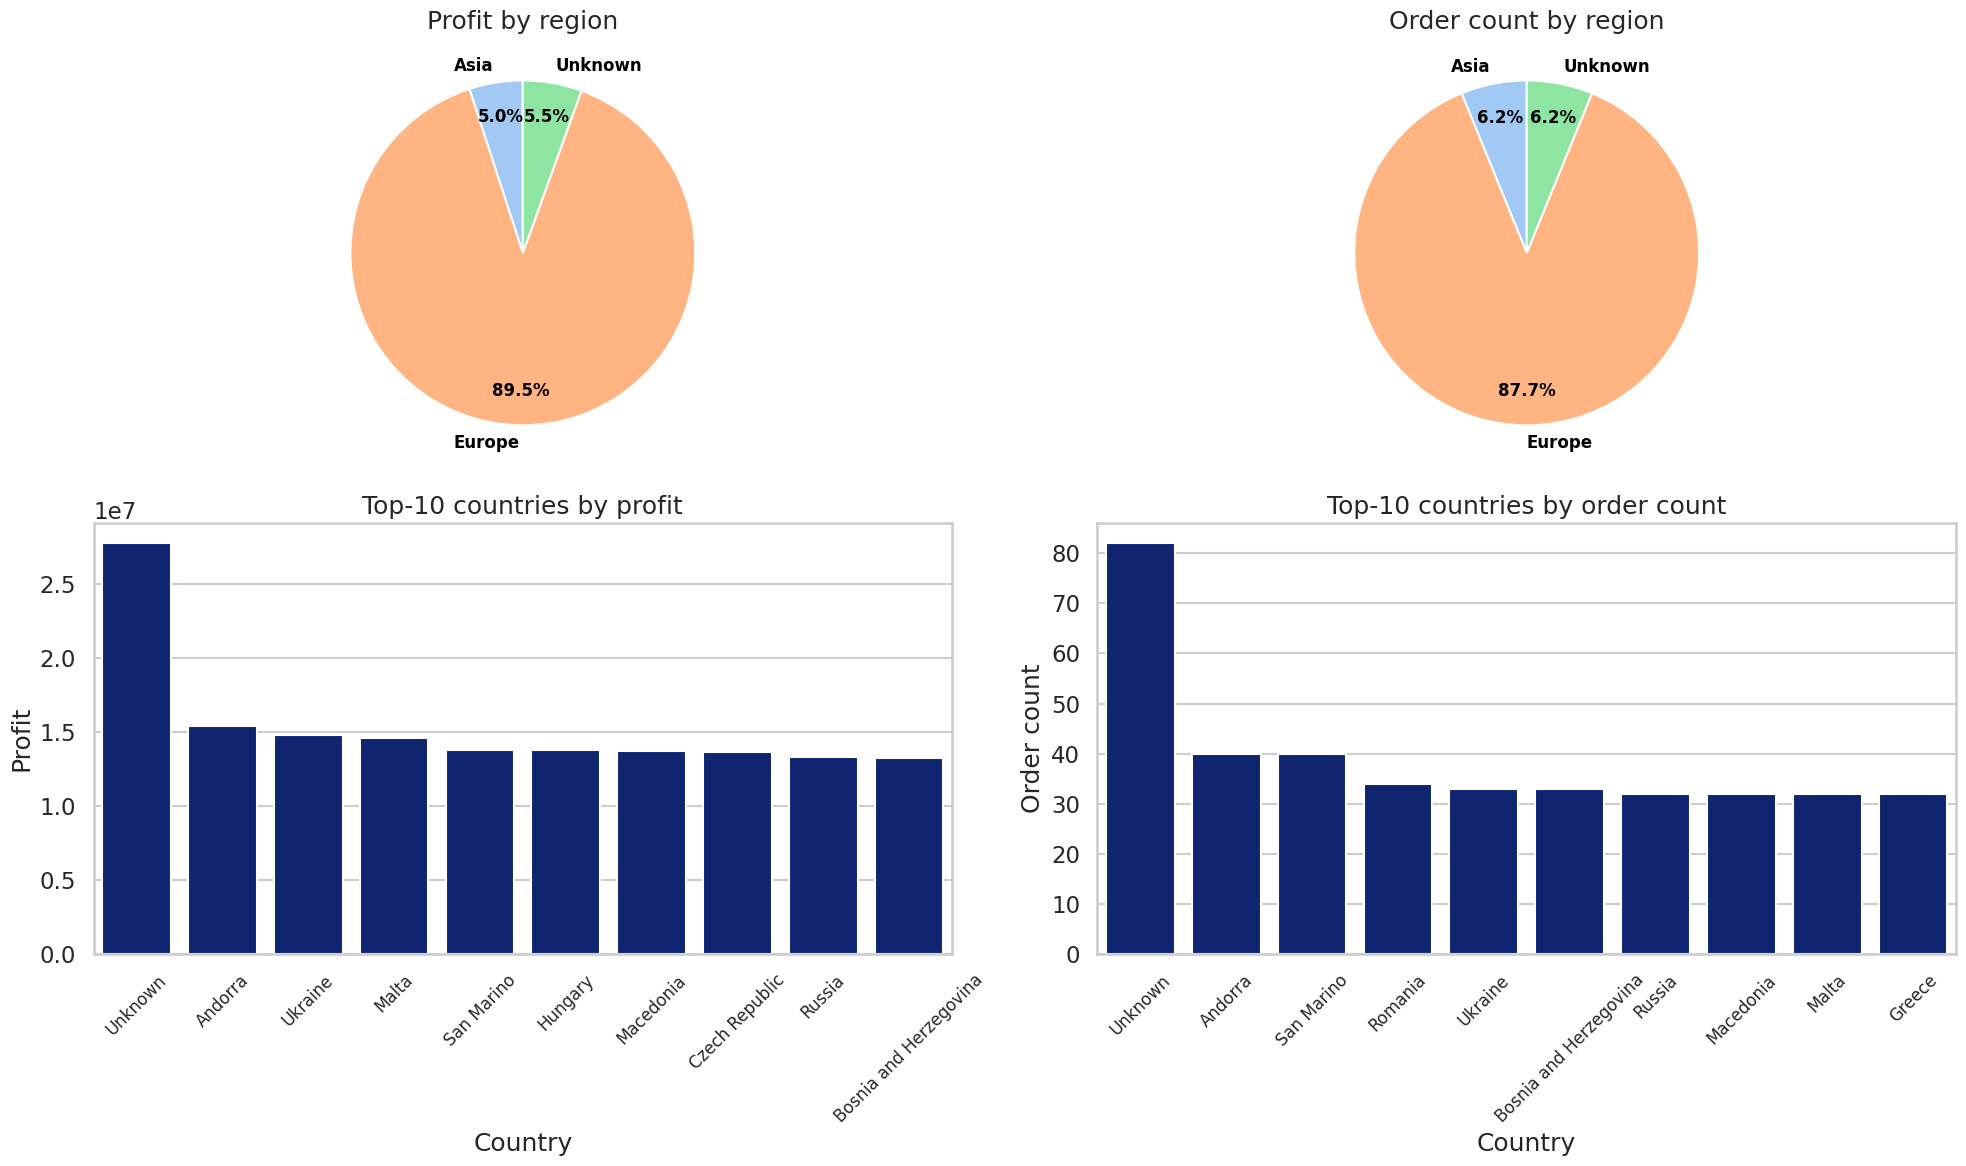

In [ ]:
sns.set_theme(style="whitegrid", context="talk", palette="dark")
fig, axes = plt.subplots(2, 2, figsize=(20,12))

axes[0,0].pie(region_summary['total_profit'], labels=region_summary.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}, pctdistance=0.8)
axes[0,0].set_title('Profit by region')

axes[0,1].pie(region_summary['order_count'], labels=region_summary.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}, pctdistance=0.8)
axes[0,1].set_title('Order count by region')

sns.barplot(data=top_10_country_by_profit, x="country", y="total_profit", errorbar=("ci", False), estimator=np.sum, ax=axes[1,0])
axes[1,0].set_title('Top-10 countries by profit')
axes[1,0].set_xlabel('Country')
axes[1,0].set_ylabel('Profit')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=12)

sns.barplot(data=top_10_country_by_order_count, x="country", y="order_count", errorbar=("ci", False), estimator=np.sum, ax=axes[1,1])
axes[1,1].set_title('Top-10 countries by order count')
axes[1,1].set_xlabel('Country')
axes[1,1].set_ylabel('Order count')
axes[1,1].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()

#**Shipment analysis**

In [ ]:
final_data["ship_time"] = (final_data["ship_date"] - final_data["order_date"]).dt.days
final_data.head()
ship_time_average = final_data["ship_time"].mean()
print(f"Average shipment time: {ship_time_average} days")

Average shipment time: 24.786897590361445 days


In [ ]:
country_ship_time = final_data.groupby('country')['ship_time'].mean()
top_10_longest_ship_time = country_ship_time.sort_values(ascending=False).head(10)
top_10_shortest_ship_time = country_ship_time.sort_values(ascending=True).head(10)
print(top_10_longest_ship_time, top_10_shortest_ship_time)

country
Hungary       32.640000
Georgia       29.695652
Austria       28.500000
Slovakia      28.466667
Luxembourg    27.750000
Lithuania     27.560000
Poland        27.464286
Russia        27.375000
Monaco        26.846154
Bulgaria      26.800000
Name: ship_time, dtype: float64 country
Croatia           18.352941
United Kingdom    18.391304
Denmark           19.692308
Estonia           20.521739
Serbia            20.586207
Latvia            20.888889
Malta             21.562500
San Marino        21.700000
Liechtenstein     22.958333
Greece            23.000000
Name: ship_time, dtype: float64


In [ ]:
region_ship_time = final_data.groupby('region')['ship_time'].mean()
region_ship_time

,ship_time
region,
Asia,26.085366
Europe,24.790378
Unknown,23.439024


In [ ]:
category_ship_time = final_data.groupby('product_category')['ship_time'].mean()
category_ship_time

,ship_time
product_category,
Baby Food,26.339286
Beverages,24.123967
Cereal,27.184466
Clothes,23.104762
Cosmetics,25.912281
Fruits,24.419643
Household,23.938144
Meat,25.909091
Office Supplies,26.707317


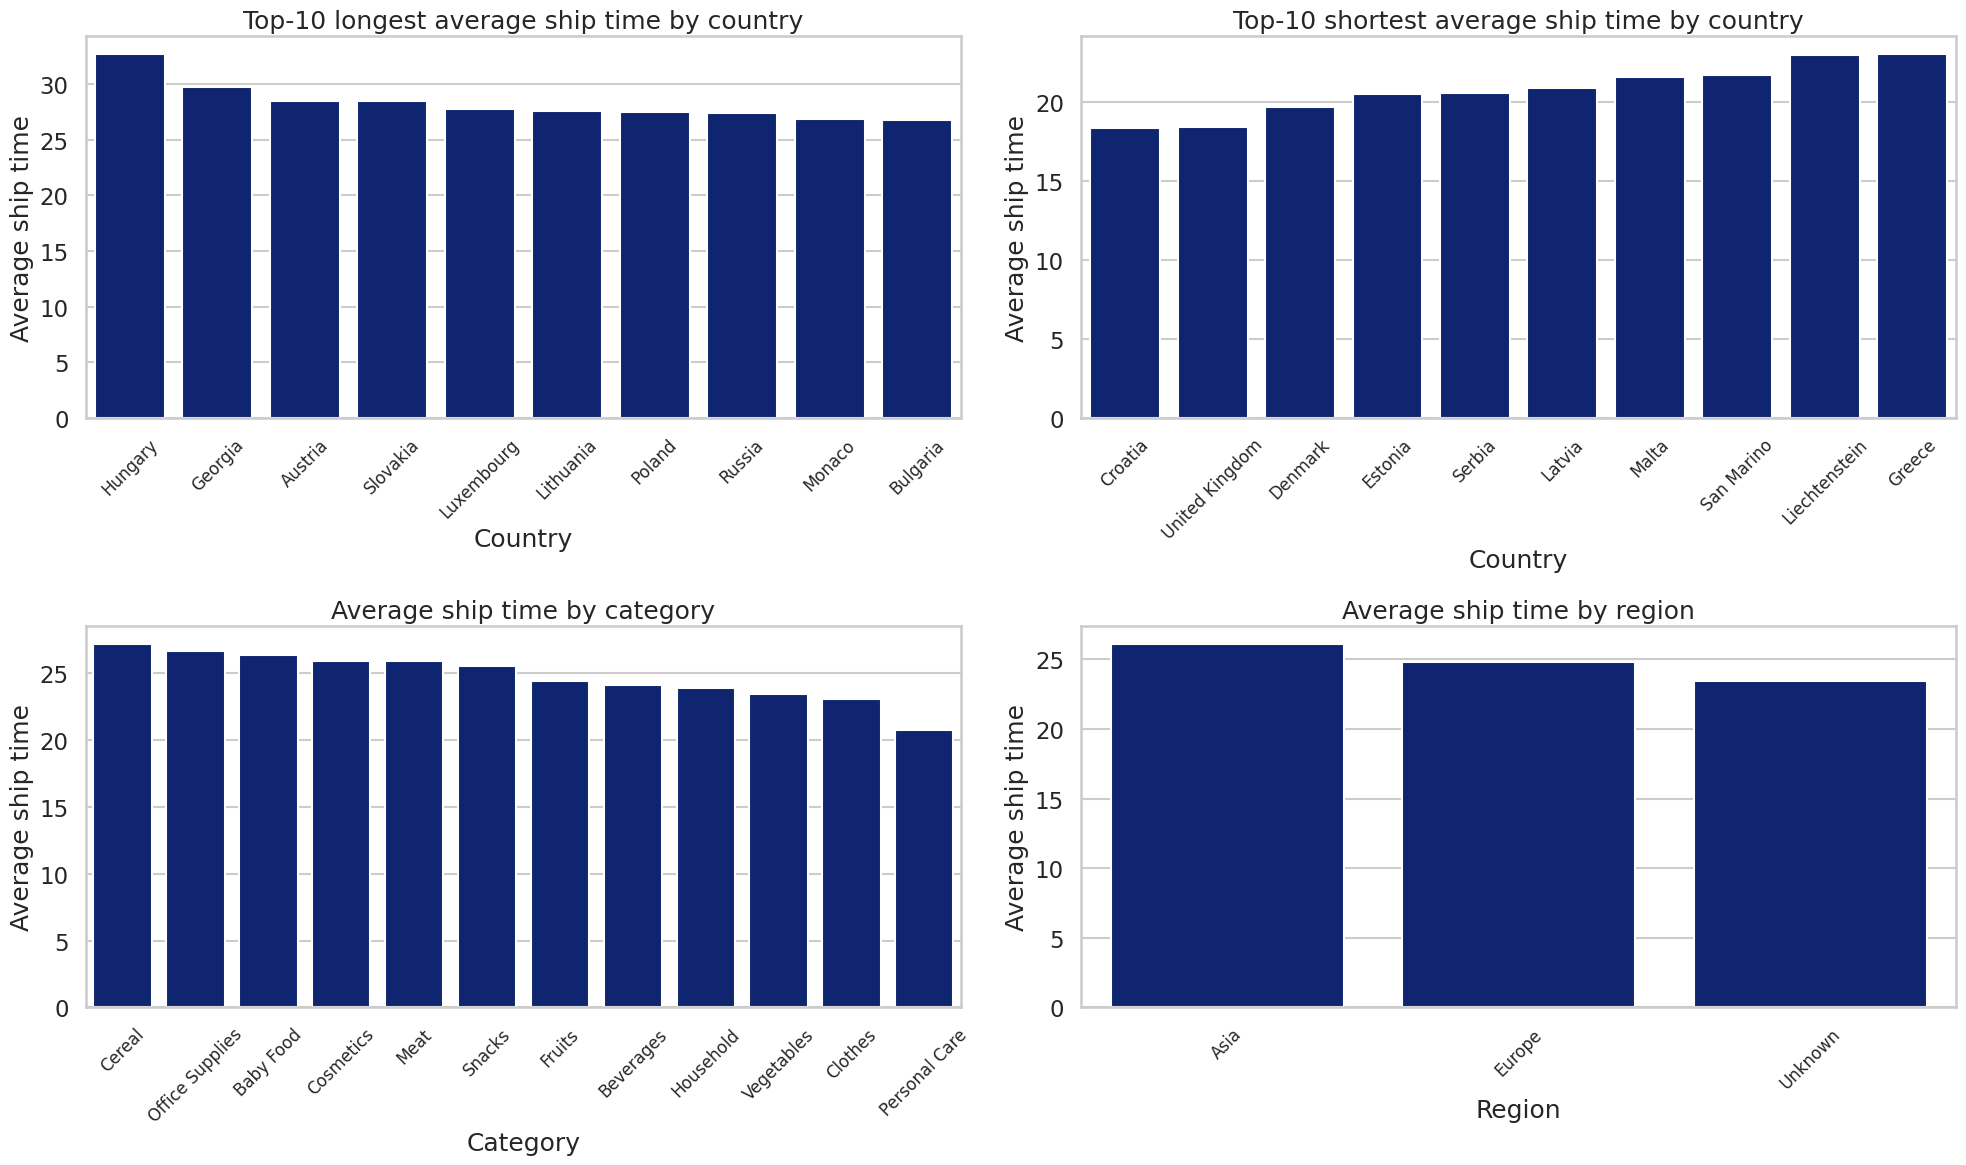

In [ ]:
sns.set_theme(style="whitegrid", context="talk", palette="dark")
fig, axes = plt.subplots(2, 2, figsize=(20,12))

top_10_longest_ship_time_df = top_10_longest_ship_time.reset_index()
top_10_longest_ship_time_df.columns = ['country', 'ship_time']
sns.barplot(data=top_10_longest_ship_time_df, x="country", y="ship_time", errorbar=("ci", False), ax=axes[0,0])
axes[0,0].set_title('Top-10 longest average ship time by country')
axes[0,0].set_xlabel('Country')
axes[0,0].set_ylabel('Average ship time')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=12)

top_10_shortest_ship_time_df = top_10_shortest_ship_time.reset_index()
top_10_shortest_ship_time_df.columns = ['country', 'ship_time']
sns.barplot(data=top_10_shortest_ship_time_df, x="country", y="ship_time", errorbar=("ci", False), ax=axes[0,1])
axes[0,1].set_title('Top-10 shortest average ship time by country')
axes[0,1].set_xlabel('Country')
axes[0,1].set_ylabel('Average ship time')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=12)

category_ship_time_df = category_ship_time.reset_index()
category_ship_time_df.columns = ['product_category', 'ship_time']
sns.barplot(data=category_ship_time_df.sort_values('ship_time', ascending=False), x="product_category", y="ship_time", errorbar=("ci", False), ax=axes[1,0])
axes[1,0].set_title('Average ship time by category')
axes[1,0].set_xlabel('Category')
axes[1,0].set_ylabel('Average ship time')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=12)

region_ship_time_df = region_ship_time.reset_index()
region_ship_time_df.columns = ['region', 'ship_time']
sns.barplot(data=region_ship_time_df.sort_values('ship_time', ascending=False), x="region", y="ship_time", errorbar=("ci", False), ax=axes[1,1])
axes[1,1].set_title('Average ship time by region')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Average ship time')
axes[1,1].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()

#**Profit vs ship time analysis**

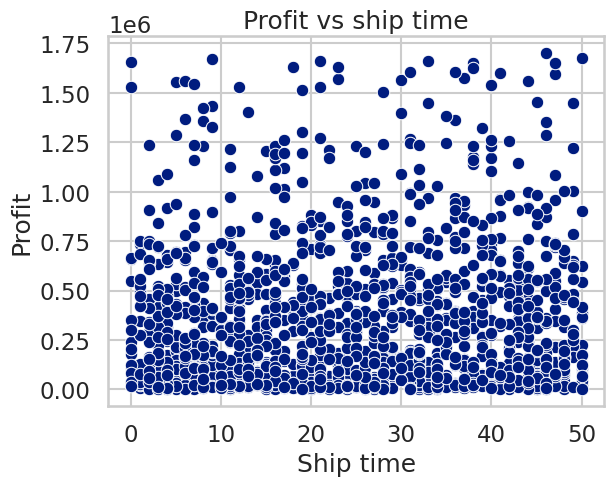

In [ ]:
sns.scatterplot(data=final_data, x="ship_time", y="total_profit")
plt.title("Profit vs ship time")
plt.xlabel("Ship time")
plt.ylabel("Profit")
plt.show()

#**Sales dynamic**

In [ ]:
category_trend = final_data.groupby(["order_date", "product_category"])["total_revenue"].sum().reset_index()
ukraine_trend = final_data[final_data["country"] == "Ukraine"]
ukraine_trend = ukraine_trend.groupby(["order_date", "country"])["total_revenue"].sum().reset_index()
europe_trend = final_data[final_data["region"] == "Europe"]
europe_trend = europe_trend.groupby(["order_date", "country"])["total_revenue"].sum().reset_index()
europe_trend_2017 = europe_trend[europe_trend["order_date"].dt.year == 2017]
clothes_trend = final_data[final_data["product_category"] == "Clothes"]
clothes_trend = clothes_trend.groupby(["order_date", "country"])["total_revenue"].sum().reset_index()
office_supplies_trend = final_data[final_data["product_category"] == "Office Supplies"]
office_supplies_trend = office_supplies_trend.groupby(["order_date", "country"])["total_revenue"].sum().reset_index()
fruits_trend = final_data[final_data["product_category"] == "Fruits"]
fruits_trend = fruits_trend.groupby(["order_date", "country"])["total_revenue"].sum().reset_index()
meat_trend = final_data[final_data["product_category"] == "Meat"]
meat_trend = meat_trend.groupby(["order_date", "country"])["total_revenue"].sum().reset_index()

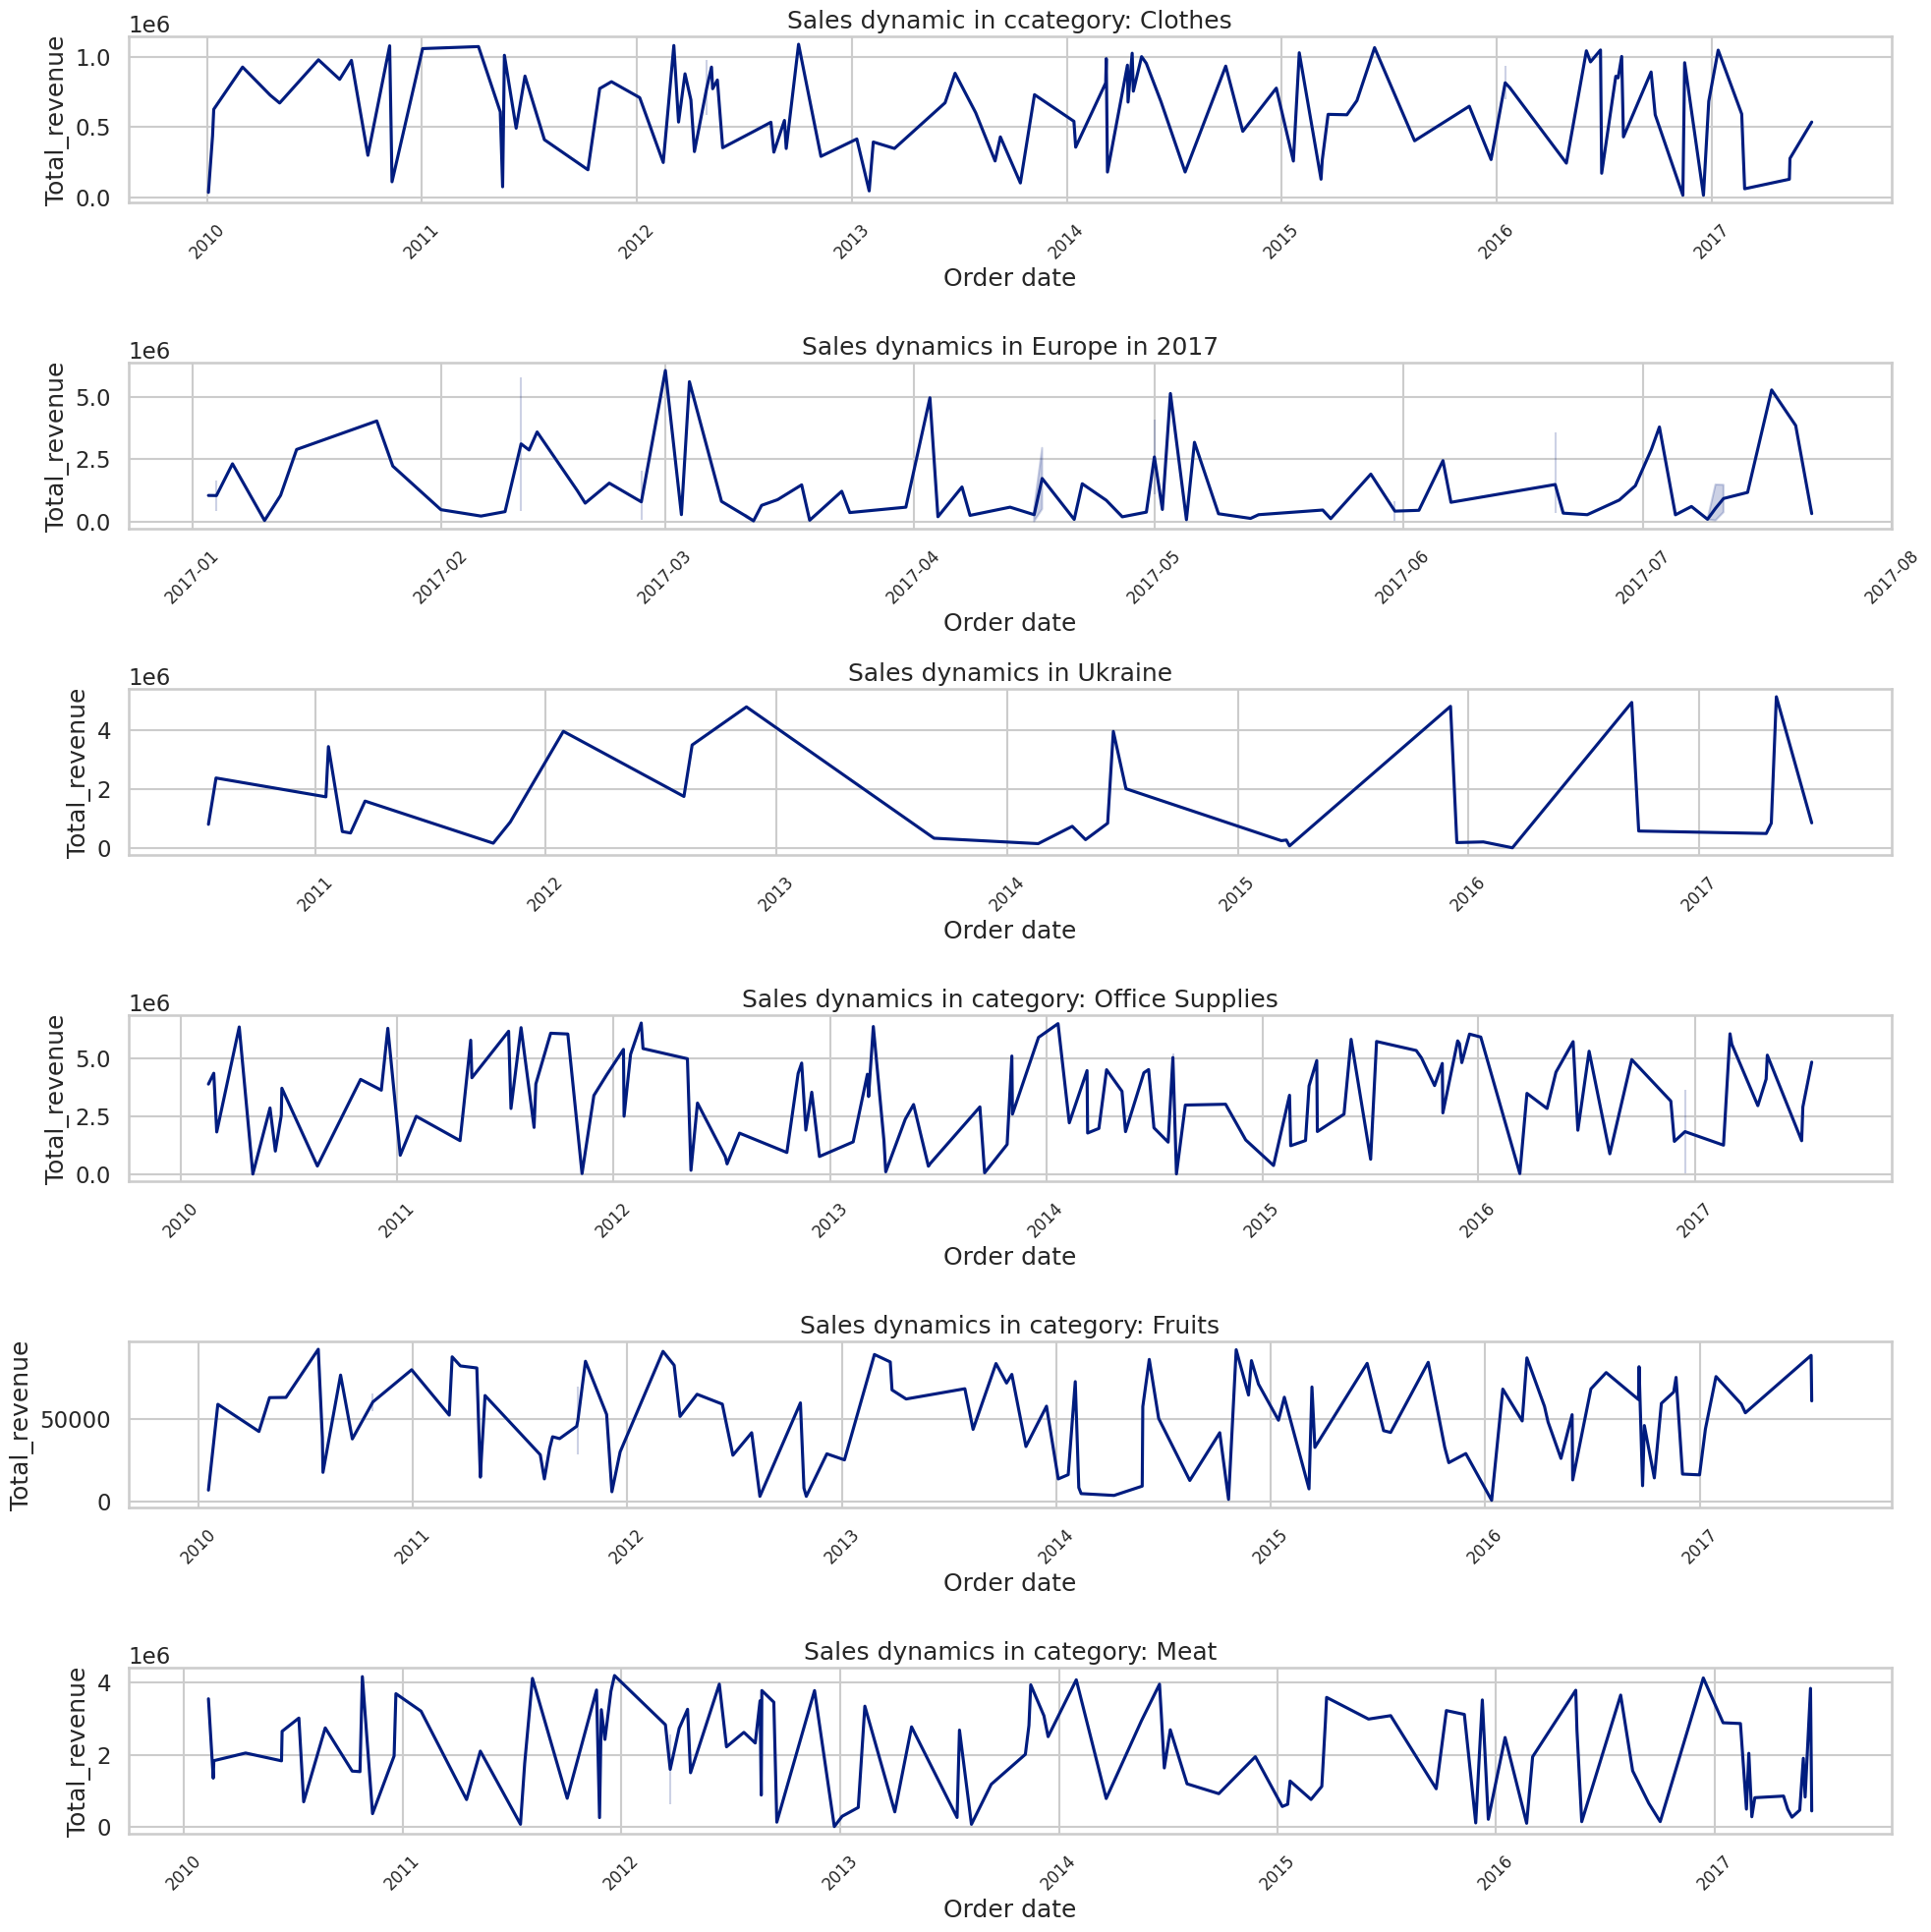

In [ ]:
sns.set_theme(style="whitegrid", context="talk", palette="dark")
fig, axes = plt.subplots(6, 1, figsize=(20,20))

sns.lineplot(data=clothes_trend, x="order_date", y="total_revenue", ax=axes[0])
axes[0].set_title('Sales dynamic in ccategory: Clothes')
axes[0].set_xlabel('Order date')
axes[0].set_ylabel('Total_revenue')
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

sns.lineplot(data=europe_trend_2017, x="order_date", y="total_revenue", ax=axes[1])
axes[1].set_title('Sales dynamics in Europe in 2017')
axes[1].set_xlabel('Order date')
axes[1].set_ylabel('Total_revenue')
axes[1].tick_params(axis='x', rotation=45, labelsize=12)

sns.lineplot(data=ukraine_trend, x="order_date", y="total_revenue", ax=axes[2])
axes[2].set_title('Sales dynamics in Ukraine')
axes[2].set_xlabel('Order date')
axes[2].set_ylabel('Total_revenue')
axes[2].tick_params(axis='x', rotation=45, labelsize=12)

sns.lineplot(data=office_supplies_trend, x="order_date", y="total_revenue", ax=axes[3])
axes[3].set_title('Sales dynamics in category: Office Supplies')
axes[3].set_xlabel('Order date')
axes[3].set_ylabel('Total_revenue')
axes[3].tick_params(axis='x', rotation=45, labelsize=12)

sns.lineplot(data=fruits_trend, x="order_date", y="total_revenue", ax=axes[4])
axes[4].set_title('Sales dynamics in category: Fruits')
axes[4].set_xlabel('Order date')
axes[4].set_ylabel('Total_revenue')
axes[4].tick_params(axis='x', rotation=45, labelsize=12)

sns.lineplot(data=meat_trend, x="order_date", y="total_revenue", ax=axes[5])
axes[5].set_title('Sales dynamics in category: Meat')
axes[5].set_xlabel('Order date')
axes[5].set_ylabel('Total_revenue')
axes[5].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()

#**Sales by weekday**

In [ ]:
sales_by_weekday = final_data["order_date"].dt.day_name().value_counts()
sales_by_weekday = sales_by_weekday.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sales_by_weekday

,count
order_date,
Monday,201
Tuesday,182
Wednesday,194
Thursday,167
Friday,176
Saturday,201
Sunday,207


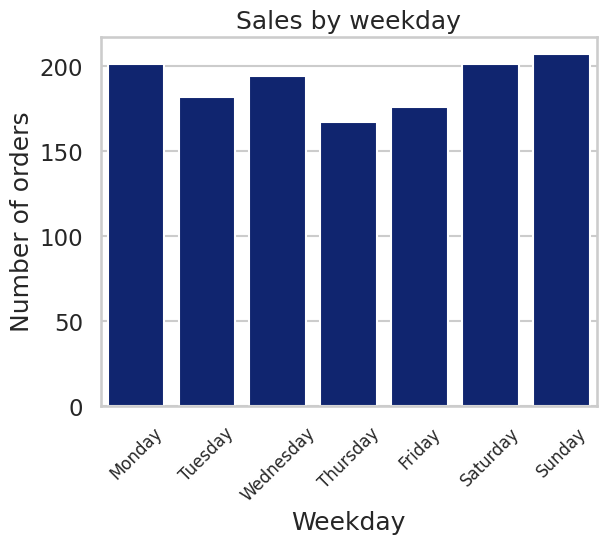

In [ ]:
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values)
plt.title("Sales by weekday")
plt.xlabel("Weekday")
plt.xticks(rotation=45, size=12)
plt.ylabel("Number of orders")
plt.show()


#**Summary**
##Key metrics:
* Number of orders: 1328
* Number of product categories: 12
* Number of covered countries: 46
* Total revenue: 1702129408.21
* Total cost: 1200694949.21
* Total profit: 501434459.0
##Top-3 categories by:
 * **Total order counts** - Office supplies, Beverages, Cosmetics;
 * **Revenue** - Cosmetics, Office supplies, Household;
 * **Cost** -  Meat, Office supplies, Household;
 * **Profit** -  Cosmetics, Household, Office supplies.

 There is no significant difference between online and offline sales. The numbers are almost equal: online sales account for 49.9% and offline sales for 50.1% of the total.

 89.5% of sales are in Europe, while only 5% are in Asia.The Top 3 countries with the highest order count are Romania, San Marino, and Andorra.The Top 3 countries with the highest profit are Ukraine, Malta, and Andorra.

 The average shipment time across all regions is 25 days.The fastest category is Personal Care products, while the slowest categorie is Cereal.Among countries, the fastest shipment times are in the United Kingdom and Croatia, whereas the slowest are in Hungary and Georgia. *Profit does not depend on shipment time.*

 Most categories have their peaks and drops, so they can be considered seasonal.

 Most sales occur on Monday, Saturday and Sunday, while the weakest day is Thursday.
